In [1]:
import pickle
import os
import pandas as pd
import numpy as np
# Added version check for recent scikit-learn 0.18 checksok ca
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition 
from sklearn.multiclass import OneVsRestClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from joblib import Parallel, delayed
from sklearn import svm
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier, LogisticRegression
_test_path =('/home/ak/Documents/features_test/')
from sklearn.linear_model import LogisticRegression

In [2]:

from sklearn import preprocessing
from sklearn.metrics import classification_report
import scipy as scp
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from time import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.learning_curve import learning_curve
import seaborn as sns
from sklearn.cross_validation import KFold
from sklearn import svm
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
%matplotlib inline
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = '/home/ak/Documents/features_test/'
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

/home/ak/Envs/DataAnalysis/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ak/Envs/DataAnalysis/local/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/ak/Envs/DataAnalysis/local/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This 

In [3]:
with open(_test_path+'HSBA.L_features.pickle', 'rb') as handle:
    HSBA_features_ = pickle.load(handle)
with open(_test_path+'HSBA.L_labelled_data.pickle', 'rb') as handle:
    HSBA_labelled_data_ = pickle.load(handle)
    
_data=HSBA_labelled_data_ #data
_features= HSBA_features_ #features
_keys= _data.keys() #dates

In [4]:
_data[_keys[0]].columns.values

y_1=_data[_keys[1]].iloc[:,4] #label_control_chart_q_30_q_70_window_5
y_2=_data[_keys[1]].iloc[:,5]#label_simple_ep_window_5_thresh_0.05- Last 4 are NaN
y_3=_data[_keys[1]].iloc[:,6]#label_simple_ep_window_5_thresh_0.00-last 4 are NaN
duration= _data[_keys[1]].iloc[:,3] #can be used for regression
y_1.dropna().astype(int).values
_gamma=_features[_keys[1]][2].as_matrix().astype(np.float)
_csi=_features[_keys[1]][3].as_matrix().astype(np.float)
_info=_features[_keys[1]][1].as_matrix().astype(np.float)
_fischer=_features[_keys[1]][0].as_matrix().astype(np.float)


In [5]:
short_rolling=_data[_keys[1]]['TradedPrice'].rolling(window=5).mean()
long_rolling=_data[_keys[1]]['TradedPrice'].rolling(window=15).mean()
ma_= (long_rolling-short_rolling).fillna(0)


In [6]:
# from collections import Counter

# print(Counter(y).keys()) # equals to list(set(words))
# freq_classes=Counter(y).values() # counts the elements' frequency
# freq_classes

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)



stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

NameError: name 'X_train' is not defined


plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
def scaler_comparison(_X,_y,C_,_scaler_type, _test_size):
    lr = LogisticRegression(penalty='l1', C=C_)
    ##get training and test set
    X_train, X_test, y_train, y_test = \
    train_test_split(_X, _y, test_size=_test_size, random_state=0)
    ##normalise
    X_train_norm = _scaler_type.fit_transform(X_train)
    X_test_norm = _scaler_type.transform(X_test)
    ##fit model
    lr_norm=lr.fit(X_train_norm, y_train)
    
    lr_score_train= lr_norm.score(X_train_norm, y_train)
    lr_score_test= lr_norm.score(X_test_norm, y_test)
    
    return lr_score_train, lr_score_test #returns Train Accuracy, returns Test Accuracy

In [21]:
def train_model(X, y, seed):
    model = svm.SVC(kernel='rbf', class_weight='balanced', gamma=0.1, random_state=seed)
    #linear_model= LinearSVC(C=100, loss="hinge",class_weight='balanced', random_state=42)
    pca = decomposition.PCA()
    pipe = make_pipeline(pca, model)
    n_components = [2,4]
    estimator = GridSearchCV(pipe,dict(pca__n_components=n_components))
    
    return pipe.fit(X, y)

In [22]:
result = Parallel(n_jobs=4)(delayed(train_model)(X_train_norm, y_train, seed) for seed in range(10))

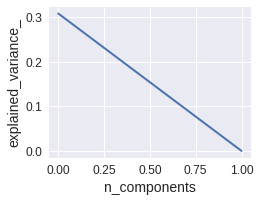

In [106]:
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
n_components = [2,4]
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Plot the PCA spectrum
pca.fit(X_train_norm)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')



In [21]:
# Prediction

Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train_norm, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()


21

from sklearn.model_selection import cross_val_score
print(cross_val_score(svm_clf1, X_train_norm, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(svm_clf2, X_train_norm, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(classif, X_train_norm, y_train, cv=5, scoring="accuracy"))


from sklearn.preprocessing import label_binarize
Y_train_brz = label_binarize(y_train, classes=[0, 1])
Y_test_brz = label_binarize(y_test, classes=[0, 1])
n_classes = Y_train_brz.shape[1]
n_classes
y_score_test = classif.decision_function(X_test)
y_score_train= classif.decision_function(X_train)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_brz[:, i],
                                                        y_score_test[:, i])
    average_precision[i] = average_precision_score(Y_test_brz[:, i], y_score_test[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_brz.ravel(),
    y_score_test.ravel())
average_precision["micro"] = average_precision_score(Y_test_brz, y_score_test,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AUC={0:0.2f}'
    .format(average_precision["micro"]))


Plot the micro-averaged Precision-Recall curve

In [26]:
y= label_binarize(y, classes=[0,1,2])
n_classes=y.shape[1]
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [28]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
# y= label_binarize(y, classes=[0,1,2])
# n_classes=y.shape[1]
# # Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# pipeline setup
cls = SVC(C=10.0, 
          kernel='rbf', 
          gamma=0.1, 
          decision_function_shape='ovr')
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma=0.1 ,probability=True,
                                 random_state=random_state))
# kernel_svm = Pipeline([('std', StandardScaler()), 
#                        ('svc', cls)])

# # gridsearch setup
# param_grid = [
#   {'svc__C': [1, 10, 100, 1000], 
#    'svc__gamma': [0.001, 0.0001], 
#    'svc__kernel': ['rbf']},
#  ]

# gs = GridSearchCV(estimator=classifier, 
#                   param_grid=param_grid, 
#                   scoring='accuracy', 
#                   n_jobs=-1, 
#                   cv=5, 
#                   verbose=1, 
#                   refit=True,
#                   pre_dispatch='2*n_jobs')

# run gridearch
classifier.fit(X_train, y_train)
# gs.fit(X_train, y_train)
model_to_set = OneVsRestClassifier(SVC(kernel="poly"))

parameters = {
    "estimator__C": [1,2,4,8],
    "estimator__kernel": ["poly","rbf"],
    "estimator__degree":[1, 2, 3, 4],
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring='accuracy', refit=True, cv=5,n_jobs=4)

_model =model_tunning.fit(X_train, y_train)
print(_model.best_score_)
print(_model.best_params_)

0.932584269663
{'estimator__kernel': 'poly', 'estimator__C': 4, 'estimator__degree': 1}


In [45]:
def train_model(_X, _y, seed,nfolds):
    #model = OneVsRestClassifier(SVC(kernel='rbf', class_weight='balanced', random_state=seed))
    Cs=[0.001, 0.01, 0.1, 1, 10]
    gammas =[0.001,0.01, 0.1, 1]
    parameters=parameters = {
        "estimator__C": [1,2,4,8],
        "estimator__kernel": ["poly","rbf","linear"],
        "estimator__degree":[1, 2, 3, 4],}
    _model= OneVsRestClassifier(SVC())
    grid_search = GridSearchCV(_model, param_grid=parameters,
                             scoring='accuracy', refit=True, cv=nfolds,n_jobs=4)
    _model_fit=grid_search.fit(_X,_y)
    return _model_fit
    

In [46]:
train_model(X_train, y_train, seed=15,nfolds=5).best_params_
    

{'estimator__C': 4, 'estimator__degree': 1, 'estimator__kernel': 'poly'}

print('Best GS Score %.2f' % gs.best_score_)
print('best GS Params %s' % gs.best_params_)


# prediction on the training set
y_pred = _model.predict(X_train_norm)
train_acc = (y_train == y_pred).sum()/len(y_train)
print('\nTrain Accuracy: %.2f' % (train_acc))

# evaluation on the test set
y_pred = _model.predict(X_test_norm)
test_acc = (y_test == y_pred).sum()/len(y_test)
print('\nTest Accuracy: %.2f' % (test_acc))


kernel_svm = Pipeline([('std', StandardScaler()), 
                       ('svc', model)])
#     # gridsearch setup
    

    gs = GridSearchCV(estimator=model, 
                      param_grid=param_grid, 
                      scoring='accuracy', 
                      n_jobs=-1, 
                      cv=10, 
                      verbose=1, 
                      refit=True,
                      pre_dispatch='2*n_jobs')
    return gs.fit(X, y)

Y_train_brz = label_binarize(y_train, classes=[0, 1, 2])
Y_test_brz = label_binarize(y_test, classes=[0, 1, 2])

'/home/ak/Documents/features_test/models/HSBA.L_20120116_clf.joblib.pkl'

In [25]:
clf.best_score_

0.6191698759092854

In [ ]:

_list=[]
for _idx in xrange(0,20):
    n_components= [2,4]
    Cs = np.logspace(-4, 4, 3)
    parameters = {"estimator__C": [1,2,4,8],
    "estimator__kernel": ["poly","rbf"],
    "estimator__degree":[0.001, 0.01, 1, 3, 4],
    "pca__n_components": n_components}
    logistic = linear_model.LogisticRegression()
    pca = decomposition.PCA()
    pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

    ##3 types of labels
    data_labels = _data[_keys[_idx]].columns.values
    label_1 = data_labels[4]
    label_2 = data_labels[5]
    label_3 = data_labels[6]
    # #train set
    _set_1,_set_2,_set_3,_set_4=feature_set(_features,_key=_idx)
    y_2, y_3, y_1 =label_set(_data,_key=_idx)
    _offset=off_set(_set_1,y_1) #this only matters for y_1? generalise

    X_1_offset= _set_1[:-_offset].as_matrix().astype(np.float)
    #define train and test labels - redundant
    X_train_std = stdsc.fit_transform(X_1_offset)
    y_train =y_1
    if len(X_train_std)==len(y_train):
        _list.append(_idx)
        print _idx
        pca.fit(X_train_std)
        pca = decomposition.RandomizedPCA(n_components=3, whiten=True).fit(X_train_std)
        X_train_pca = pca.transform(X_train_std)
        estimator = GridSearchCV(pipe, dict(pca__n_components=n_components,logistic__C=Cs))
        estimator.fit(X_train_std, y_train)
        print('Logistic Best Score:')
        print(estimator.best_score_)
        param_grid = dict(kernel =["rbf","linear"],
                      C=[1, 5, 10, 50, 100],
                      gamma=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1])
        clf = GridSearchCV(SVC(kernel='linear'), param_grid, verbose=1)
        clf.fit(X_train_std, y_train)
        print('SVM Best Params & Score:')
        print clf.best_params_, clf.best_score_
    else:
        pass
    



    
    

    
    



0


/home/ak/Envs/DataAnalysis/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Logistic Best Score:
0.637256371814
Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [132]:
_idx_range=len(_keys)

In [168]:
len(_csi)==len(y_2)
#unique, counts = np.unique(y_2, return_counts=True)


False

In [130]:
train_model(X_train, y_train, seed=15)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=15, shrinking=True,
  tol=0.001, verbose=False))])

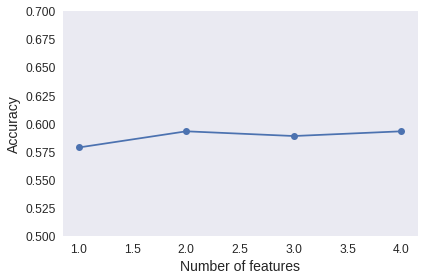

In [160]:
from sklearn.neighbors import KNeighborsClassifier
    
knn = KNeighborsClassifier(n_neighbors=5)
# selecting features using SBS
sbs = SBS(knn, k_features=1)
sbs.fit(X_train, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 0.7])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
    # plt.savefig('./sbs.png', dpi=300)
plt.show()

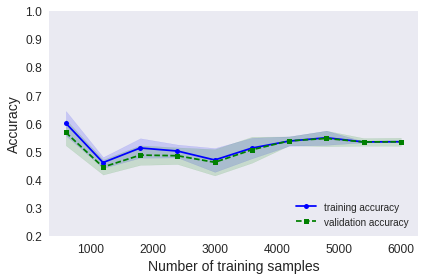

In [165]:
classif = svm.SVC(kernel='rbf',C=10, class_weight='balanced', gamma=0.1)
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=classif,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

In [164]:
from sklearn.model_selection import cross_val_score

cross_val_score(classif, X_train, y_train, cv=5, scoring="accuracy")

array([ 0.53632959,  0.52284644,  0.54197901,  0.52288072,  0.55063766])

In [56]:
def off_set(array_1, array_2):
    off_set= len(array_1)-len(array_2)
    return off_set

def simpleInputs(_X,_y):
    _offset =np.abs(off_set(_X,_y))
    if _offset==0:
        X = _X.as_matrix().astype(np.float)
        y=_y.astype(np.int)
    else:
        X= _X[:-_offset].as_matrix().astype(np.float)
        y = _y.astype(np.int)
    return X, y

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()


In [57]:
df_new=pd.concat([_csi, _gamma,_fischer,short_rolling], axis=1).dropna()
np.shape(df_new)


(13340, 10)

In [ ]:

for _idx in xrange(0,3):

    #various types of labels
    y_1 = _data[_keys[_idx]].iloc[:, 4].dropna().astype(int).values  # label_control_chart_q_30_q_70_window_5
    y_2 = _data[_keys[_idx]].iloc[:, 5].dropna().astype(int).values  # label_simple_ep_window_5_thresh_0.05- Last 4 are NaN
    y_3 = _data[_keys[_idx]].iloc[:, 6].dropna().astype(int).values  # label_simple_ep_window_5_thresh_0.00-last 4 are NaN
    duration = _data[_keys[_idx]].iloc[:, 3].dropna().astype(int).values  # can be used for regression
    short_rolling=_data[_keys[_idx]]['TradedPrice'].rolling(window=5).mean()
    long_rolling=_data[_keys[_idx]]['TradedPrice'].rolling(window=15).mean()
    ma_signal = (long_rolling -short_rolling).fillna(0)

    # feature set
    _gamma = _features[_keys[_idx]][2]
    _csi = _features[_keys[_idx]][3]
    _info = _features[_keys[_idx]][1]
    _fischer = _features[_keys[_idx]][0]
    df_new=pd.concat([_csi, _gamma,_fischer,short_rolling], axis=1).dropna()


   
    X,y =simpleInputs(df_new,y_3)
  
    print(len(np.unique(y))) #of classes

    X_mms=X= mms.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=.5,random_state=0)

#     # # Train a SVM classification model
    param_grid = dict(kernel =["rbf","linear"],
                      C=[5],
                      gamma=[0.0001])
#     clf = GridSearchCV(SVC(kernel='rbf'), param_grid,
#                    verbose=1)
    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, verbose=1)

    clf.fit(X_train, y_train)
    train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='training accuracy')

    plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.2, 1.0])
    plt.tight_layout()
    # plt.savefig('./figures/learning_curve.png', dpi=300)
    plt.show()
    print('SVM Best Params & Score:')
    print clf.best_params_, clf.best_score_


2
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.8s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.8s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.3s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.9s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.4s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.3s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.6s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.3s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [96]:
test=3
y_ = _data[_keys[test]].iloc[:, 6].dropna().astype(int).values
np.unique(y_)

array([-1,  1])

In [ ]:
list_models=os.listdir(_test_path+'/models/')
_models_path= os.path.join(_test_path,'models')

test

In [28]:
# #a=_test_path+'HSBA.L20120119_classifier.joblib.pkl'
# os.getenv('FINANCE_DATA')
# _models_path
_scores=[]
for _model, _ in enumerate(list_models):
    test= os.path.join(_models_path, list_models[_model])
    clf = pickle.load(open(test))
    _scores.append(clf.best_score_)

In [29]:
F_scores

[0.6225642161204605,
 0.6191698759092854,
 0.5839869281045752,
 0.6225729675560566,
 0.6936824928121843,
 0.49308678993836413,
 0.5678141258641579,
 0.5640600152112286]

In [40]:

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score,recall_score,precision_score
for _model, _ in enumerate(list_models):
    test= os.path.join(_models_path, list_models[_model])
    clf = pickle.load(open(test))
    for _idx in xrange(9, 10):
        # various types of labels
        y_1 = _data[_keys[_idx]].iloc[:, 4].dropna().astype(int).values  # label_control_chart_q_30_q_70_window_5
        y_2 = _data[_keys[_idx]].iloc[:, 5].dropna().astype(int).values  # label_simple_ep_window_5_thresh_0.05- Last 4 are NaN
        y_3 = _data[_keys[_idx]].iloc[:, 6].dropna().astype(int).values  # label_simple_ep_window_5_thresh_0.00-last 4 are NaN
        duration = _data[_keys[_idx]].iloc[:, 3].dropna().astype(int).values  # can be used for regression

        # feature set
        _gamma = _features[_keys[_idx]][2]
        _csi = _features[_keys[_idx]][3]
        _info = _features[_keys[_idx]][1]
        _fischer = _features[_keys[_idx]][0]
    
        X, y = simpleInputs(_csi, y_3)

        print("number of classes:",len(np.unique(y)))  # of classes
        

        X_mms = X = mms.fit_transform(X)
        y_predict= clf.predict(X_mms)
        
        print('ROC AUC: %.3f' % roc_auc_score(y, y_predict))
        print('Accuracy: %.2f' % accuracy_score(y, y_predict))
        print('Precision: %.3f' % precision_score(y_true=y, y_pred=y_predict))
        print('Recall: %.3f' % recall_score(y_true=y, y_pred=y_predict))
        print('F1: %.3f' % f1_score(y_true=y, y_pred=y_predict))
     
    

('number of classes:', 2)
ROC AUC: 0.466
Accuracy: 0.35
Precision: 0.275
Recall: 0.755
F1: 0.403
('number of classes:', 2)
ROC AUC: 0.546
Accuracy: 0.50
Precision: 0.325
Recall: 0.658
F1: 0.435
('number of classes:', 2)
ROC AUC: 0.547
Accuracy: 0.50
Precision: 0.325
Recall: 0.657
F1: 0.435
('number of classes:', 2)
ROC AUC: 0.500
Accuracy: 0.29
Precision: 0.292
Recall: 1.000
F1: 0.452
('number of classes:', 2)
ROC AUC: 0.500
Accuracy: 0.29
Precision: 0.292
Recall: 1.000
F1: 0.452
('number of classes:', 2)
ROC AUC: 0.466
Accuracy: 0.35
Precision: 0.275
Recall: 0.754
F1: 0.403
('number of classes:', 2)
ROC AUC: 0.467
Accuracy: 0.35
Precision: 0.275
Recall: 0.755
F1: 0.403
('number of classes:', 2)
ROC AUC: 0.448
Accuracy: 0.41
Precision: 0.257
Recall: 0.539
F1: 0.349


In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')incre

plot_decision_regions(X=X_mms, y=y,
                      classifier=clf, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

In [25]:
import fnmatch
ticker='HSBA.L'
_models_path = '/home/ak/Documents/features_test/models/'
list_models=fnmatch.filter(os.listdir(_models_path),str(ticker)+'*.pkl')
list_models[1]

'HSBA.L_20120116_clf.joblib.pkl'

In [26]:
os.listdir('/home/ak/Documents/features_test')

['models',
 'EEM_labelled_data.pickle',
 'graphs',
 'MS.N_labelled_data.pickle',
 'C.N_features.pickle',
 'C.N_labelled_data.pickle',
 'HSBA.L_20120119_classifier.joblib.pkl',
 'HSBA.L_20120119_classifier.joblib.pkl__',
 'HSBA.L_features.pickle',
 'MS.N_features.pickle',
 'predictions',
 'EEM_features.pickle',
 'HSBA.L20120119_classifier.joblib.pkl',
 'HSBA.L_labelled_data.pickle',
 'HSBA.L_20120109_clf.joblib.pkl',
 'C.N_clfs_.pkl']

In [46]:
_predictions_path='/home/ak/Documents/features_test/'+'/predictions/'
prediction_results =np.load(_predictions_path+'C.N_model_results.npy').item()

In [47]:
type(prediction_results['ROC'][0][0])

numpy.float64

In [48]:
prediction_results.keys()

['clf', 'ROC', 'model_date', 'data_date', 'accuracy']

In [54]:
pd.DataFrame(prediction_results['accuracy'])

,0,1,2,3,4,5,6,7
0,0.738100,0.261900,0.261900,0.738100,0.261900,0.738100,0.262091,0.262091
1,0.678349,0.674566,0.321651,0.678349,0.321651,0.678349,0.678015,0.677570
2,0.722508,0.278497,0.277492,0.722508,0.277492,0.722508,0.279000,0.278874
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
